# Classification of Survived Passengers on Titanic Dataset

The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We have to make a model which will predict their survival. The features are as follows:  

Survived - Survival (0 = No; 1 = Yes)  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name - Name  
Sex - Sex  
Age - Age  
SibSp - Number of Siblings/Spouses Aboard  
Parch - Number of Parents/Children Aboard  
Ticket - Ticket Number  
Fare - Passenger Fare (British pound)  
Cabin - Cabin  
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## Solve the following questions:
1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 
2. Plot a bar chart of the survived column. 
3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 
4. Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html
5. Check if there are missing values in any columns. Remove such rows in the dataset.  
6. Convert categorical values (if any) to numbers in the dataset.
7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?
8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

## Decision Tree Modelling
#### Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

## Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

## Which of the two models fairs better? 


### BONUS(2%)
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization.

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("./data/titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. <br> A1.

##### Importing additional libraries for further processing

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### Based on the Logical Reasoning, the following columns will be dropped : <br>
##### 1. Ticket => The ticket number does not have any relevance whether the pasenger survived or not. Not any special concession was given for survival of the people based on their Ticket Number. <br>
##### 2. Cabin => As we can see there are some NaN values in the Cabin column and also it would decrease the performance of our future model. <br>
##### 3. Name => Name of each passenger is unique and it would be difficult to convert these into Numerical value.

In [5]:
newdf = titanic.drop(["Ticket","Cabin","Name"] , axis = 1)
newdf

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


##### Here, we have also reduced the dimensionality of the DataSet so that it would be easy to train.

## 2. Plot a bar chart of the survived column.  <br> A2.

##### To plot bar chart for the survived column, we will choose the respective column and pass it to bar() of matplotlib.pyplot.

In [6]:
sur_count = newdf['Survived'].value_counts()
sur_columns = newdf['Survived'].value_counts().index

print("Number of Survived and Non-Survived Passengers:\n",sur_count)
print("Index for Bar Chart:\n",sur_columns)

Number of Survived and Non-Survived Passengers:
 0    549
1    342
Name: Survived, dtype: int64
Index for Bar Chart:
 Int64Index([0, 1], dtype='int64')


##### Here, we have separated the count of Survived and Non-Survived Passengers and also the colunmns which will be input to plt.bar() function.

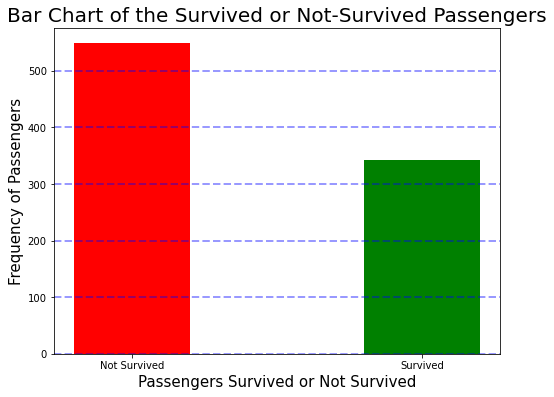

In [7]:
# Plotting the Bar Chart
plt.figure(figsize = (8,6))
plt.bar(sur_columns,sur_count,color = ['r','g'],tick_label=['Not Survived','Survived'],width = 0.4)
plt.grid(color = 'b',linestyle='--', linewidth=2, axis='y', alpha = 0.4)
plt.xlabel("Passengers Survived or Not Survived",fontsize = 15)
plt.ylabel("Frequency of Passengers",fontsize = 15)
plt.title("Bar Chart of the Survived or Not-Survived Passengers",fontsize = 20)
plt.show()

## 3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not.  <br>A3.

##### For number of males and females, we have to first separate the males and females from the whole DataSet.

In [8]:
males = newdf[newdf['Sex'] == "male"]
females = newdf[newdf['Sex'] == "female"]

##### We will first plot the Bar Chart for Females and then for the Males.

In [9]:
# Segregating Females:
sur_females = females[females['Survived'] == 1]['Survived']
nosur_females = females[females['Survived'] == 0]['Survived']
#print(sur_females)
#print(nosur_females)

freq_sur_females = len(sur_females)
freq_nosur_females = len(nosur_females)
print("Number of Survived Females: \t",freq_sur_females)
print("Number of Non-Survived Females:\t",freq_nosur_females)

Number of Survived Females: 	 233
Number of Non-Survived Females:	 81


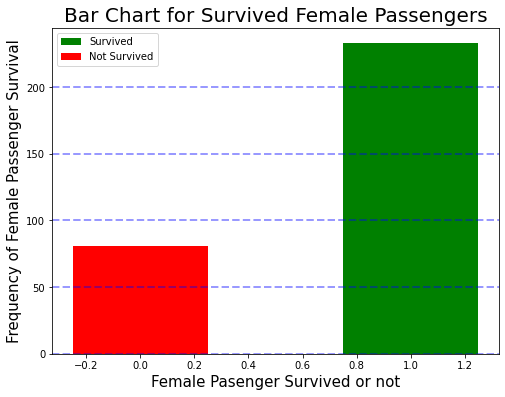

In [10]:
# Plotting the Bar Chart for Females:

plt.figure(figsize = (8,6))
plt.bar(sur_females,freq_sur_females,color = 'g' , width = 0.5 , label = "Survived")
plt.bar(nosur_females,freq_nosur_females,color = 'r' , width = 0.5 , label = "Not Survived")
plt.legend()
plt.title("Bar Chart for Survived Female Passengers" , fontsize = 20)
plt.xlabel("Female Pasenger Survived or not" , fontsize = 15)
plt.ylabel("Frequency of Female Passenger Survival" , fontsize = 15)
plt.grid(color = 'b',linestyle='--', linewidth=2, axis='y', alpha = 0.4)
plt.show()

In [11]:
# Segregating Males:
sur_males = males[males['Survived'] == 1]['Survived']
nosur_males = males[males['Survived'] == 0]['Survived']

freq_sur_males = len(sur_males)
freq_nosur_males = len(nosur_males)
print("Number of Survived Males: \t",freq_sur_males)
print("Number of Non-Survived Males:\t",freq_nosur_males)

Number of Survived Males: 	 109
Number of Non-Survived Males:	 468


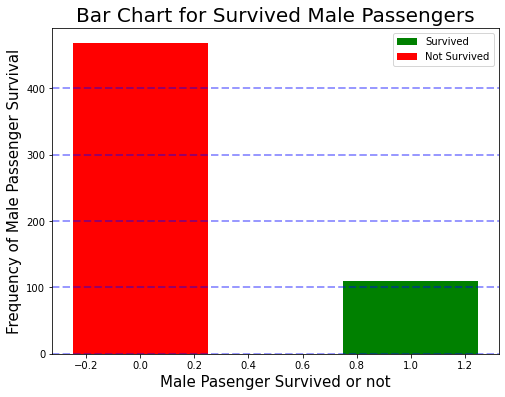

In [12]:
# Plotting the Bar Chart for Males:

plt.figure(figsize = (8,6))
plt.bar(sur_males,freq_sur_males,color = 'g' , width = 0.5 , label = "Survived")
plt.bar(nosur_males,freq_nosur_males,color = 'r' , width = 0.5 , label = "Not Survived")
plt.legend()
plt.title("Bar Chart for Survived Male Passengers" , fontsize = 20)
plt.xlabel("Male Pasenger Survived or not" , fontsize = 15)
plt.ylabel("Frequency of Male Passenger Survival" , fontsize = 15)
plt.grid(color = 'b',linestyle='--', linewidth=2, axis='y', alpha = 0.4)
plt.show()

## 4. Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html <br> A4.

##### First, we will separate the needed columns from out DataFrame for further processing so that there will be less Data to handle for the Stacked Bar Chart.

In [13]:
st_bar_df = newdf[['Pclass','Survived']]
st_bar_df

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


##### We will now separate the Passengers (Survived and Non-Survived) as per 3 classes.

In [14]:
b1_s = st_bar_df[(st_bar_df['Survived'] == 1) & (st_bar_df['Pclass'] == 1)]
b2_s = st_bar_df[(st_bar_df['Survived'] == 1) & (st_bar_df['Pclass'] == 2)]
b3_s = st_bar_df[(st_bar_df['Survived'] == 1) & (st_bar_df['Pclass'] == 3)]

b1_ns = st_bar_df[(st_bar_df['Survived'] == 0) & (st_bar_df['Pclass'] == 1)]
b2_ns = st_bar_df[(st_bar_df['Survived'] == 0) & (st_bar_df['Pclass'] == 2)]
b3_ns = st_bar_df[(st_bar_df['Survived'] == 0) & (st_bar_df['Pclass'] == 3)]

##### Now, we will concatenate all these values as per 1st , 2nd and 3rd class and store them in list -> Survived and Not_Survived which will form our input to the Stacked Bar Chart.

In [15]:
Survived = []
Not_Survived = []

In [16]:
Survived.append(b1_s.shape[0])
Survived.append(b2_s.shape[0])
Survived.append(b3_s.shape[0])
Not_Survived.append(b1_ns.shape[0])
Not_Survived.append(b2_ns.shape[0])
Not_Survived.append(b3_ns.shape[0])
print(Survived)
print(Not_Survived)

[136, 87, 119]
[80, 97, 372]


#####  Now, as we have three classes; hence the value of N i.e. index for X-Axis will be 3.

In [17]:
N = 3
ind = np.arange(N)
width = 0.4
SurvivedStd = (20, 20, 20)
Not_SurvivedStd = (20, 20, 20)

##### We have created relevent data for the formation of our Stacked Bar Chart. So, we will now plot our Stacked Bar Chart.

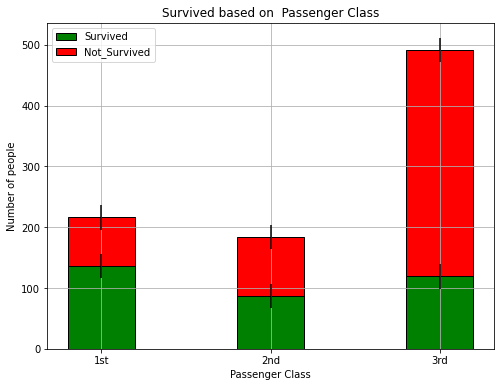

In [18]:
plt.figure(figsize = (8,6))
p1 = plt.bar(ind, Survived, width, color='g', yerr=SurvivedStd,edgecolor='k')
p2 = plt.bar(ind, Not_Survived, width, color='r',bottom=Survived, yerr=Not_SurvivedStd,edgecolor='k')

plt.xlabel('Passenger Class')
plt.ylabel('Number of people')
plt.title('Survived based on  Passenger Class')
plt.xticks(ind, ('1st', '2nd', '3rd'))
plt.yticks()
plt.legend((p1[0], p2[0]), ('Survived', 'Not_Survived'))
plt.grid()
plt.show()

## 5. Check if there are missing values in any columns. Remove such rows in the dataset.  <br> A5.

##### We will process this for our trimmed DataFrame "newdf". 

In [19]:
print(newdf.head(10))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S
5            6         0       3    male   NaN      0      0   8.4583        Q
6            7         0       1    male  54.0      0      0  51.8625        S
7            8         0       3    male   2.0      3      1  21.0750        S
8            9         1       3  female  27.0      0      2  11.1333        S
9           10         1       2  female  14.0      1      0  30.0708        C


In [20]:
newdf.shape

(891, 9)

##### Now we will check that if there are NaN values, drop them and observe the change in shape of "newdf" DataFrame.

In [21]:
newdf = newdf.dropna()

In [22]:
newdf.shape

(712, 9)

##### Thus, we have sucessfuly eliminated the NaN values from the DataFrame and reduced the shape of the DataFrame from 891 to 712.

## 6. Convert categorical values (if any) to numbers in the dataset. <br> A6.

##### For classifying categorical values, we first take a look of the DataFrame and decide which columns will be given to our model for Training.

In [23]:
newdf

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


##### Here, we will give the following columns to our Model for Training:
##### 1. PassengerId <br> 2. Survived <br> 3. Pclass <br> 4. Sex <br>5. Age <br> 6. SibSp <br> 7. Parch <br> 8. Embarked

#####  From the above columns only "Sex" and "Embarked" columns are categorical in nature. So, we wil conver them into numerical entries.

#####  We will first separate unique values from both the columns.

In [24]:
sex_col_unique = list(newdf['Sex'].unique())
sex_col_unique

['male', 'female']

In [25]:
em_col_unique = list(newdf['Embarked'].unique())
em_col_unique

['S', 'C', 'Q']

##### Now we will create dictionary with help of above values for mapping numeric values to categorical entites.

In [26]:
sex_range = list(range(len(sex_col_unique)))
em_range = list(range(len(em_col_unique)))
print(sex_range)
print(em_range)

[0, 1]
[0, 1, 2]


In [27]:
sex_mapping = dict(zip(sex_col_unique,sex_range))
print(sex_mapping)

{'male': 0, 'female': 1}


In [28]:
em_mapping = dict(zip(em_col_unique,em_range))
print(em_mapping)

{'S': 0, 'C': 1, 'Q': 2}


In [29]:
newdf = newdf.copy()

##### Now we will apply the dictionaries - 'sex_mapping' and 'em_mapping' for converting Categorical Values to Numeric Entries.

In [30]:
newdf['n_Sex'] = newdf['Sex'].apply(lambda x : sex_mapping[x])
newdf['n_Embarked'] = newdf['Embarked'].apply(lambda e : em_mapping[e])
newdf

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,n_Sex,n_Embarked
0,1,0,3,male,22.0,1,0,7.2500,S,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,1
2,3,1,3,female,26.0,0,0,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,1,2
886,887,0,2,male,27.0,0,0,13.0000,S,0,0
887,888,1,1,female,19.0,0,0,30.0000,S,1,0
889,890,1,1,male,26.0,0,0,30.0000,C,0,1


##### So, now we will get a sliced DataFrame of only numerical valued columns for our future model.

In [31]:
df = newdf[['PassengerId','Pclass','Age','SibSp','Parch','Fare','n_Sex','n_Embarked','Survived']]
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,n_Sex,n_Embarked,Survived
0,1,3,22.0,1,0,7.2500,0,0,0
1,2,1,38.0,1,0,71.2833,1,1,1
2,3,3,26.0,0,0,7.9250,1,0,1
3,4,1,35.0,1,0,53.1000,1,0,1
4,5,3,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
885,886,3,39.0,0,5,29.1250,1,2,0
886,887,2,27.0,0,0,13.0000,0,0,0
887,888,1,19.0,0,0,30.0000,1,0,1
889,890,1,26.0,0,0,30.0000,0,1,1


## 7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead? <br> A7.

##### We will first print only the Correlational Matrix of the DataFrame 'df' and then will produce the Heatmap of the same. <br> For correlational matrix of DataFrame 'df':

In [32]:
print("CORRELATIONAL MATRIX: \n")
print(df.corr())

CORRELATIONAL MATRIX: 

             PassengerId    Pclass       Age     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.035609  0.033681 -0.082704 -0.011672  0.009655   
Pclass         -0.035609  1.000000 -0.365902  0.065187  0.023666 -0.552893   
Age             0.033681 -0.365902  1.000000 -0.307351 -0.187896  0.093143   
SibSp          -0.082704  0.065187 -0.307351  1.000000  0.383338  0.139860   
Parch          -0.011672  0.023666 -0.187896  0.383338  1.000000  0.206624   
Fare            0.009655 -0.552893  0.093143  0.139860  0.206624  1.000000   
n_Sex          -0.024674 -0.150826 -0.099037  0.106296  0.249543  0.182457   
n_Embarked     -0.013757 -0.108502  0.012186  0.004021 -0.014082  0.176859   
Survived        0.029526 -0.356462 -0.082446 -0.015523  0.095265  0.266100   

                n_Sex  n_Embarked  Survived  
PassengerId -0.024674   -0.013757  0.029526  
Pclass      -0.150826   -0.108502 -0.356462  
Age         -0.099037    0.012186 -0.082446  
SibSp      

##### The inter related columns are: <br> 1. PassengerID <br>2. Pclass <br>3. Age <br> 4. SibSp <br> 5. Parch <br> 6. Fare <br>7.  n_Sex <br> 8. n_Embarked <br> 9. Survived

##### For HeatMap of the Correlational Matrix of DataFrame 'df':

AxesSubplot(0.125,0.125;0.62x0.755)


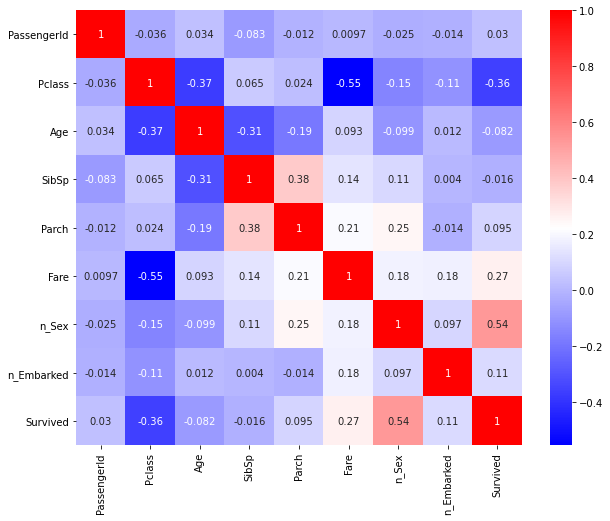

In [33]:
plt.subplots(figsize = (10,8))
print(sb.heatmap(df.corr(),annot = True ,cmap = 'bwr'))

##### By observing the HeatMap over our output column "Survived":
##### 1. Survived column has a very weak correlation with "PassengerID" , "Age" ,"SibSp" and "Parch" columns. <br> 2. Survived column has relatively high correlation with "PClass" ,"Fare" , "n_Sex" and "n_Embarked" columns. <br>

##### Even though the columns "PassengerID" , "Age" ,"SibSp" and "Parch" have low correlation with the "Survived" column, they are inter-related columns and have a relatively high correlation with coluns other than "Survived". <br> Hence, we cannot drop any column here even though some columns have a low correlation with the "Survived" column.

In [34]:
final_df = df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','n_Sex','n_Embarked','Survived']]
final_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,n_Sex,n_Embarked,Survived
0,1,3,22.0,1,0,7.2500,0,0,0
1,2,1,38.0,1,0,71.2833,1,1,1
2,3,3,26.0,0,0,7.9250,1,0,1
3,4,1,35.0,1,0,53.1000,1,0,1
4,5,3,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
885,886,3,39.0,0,5,29.1250,1,2,0
886,887,2,27.0,0,0,13.0000,0,0,0
887,888,1,19.0,0,0,30.0000,1,0,1
889,890,1,26.0,0,0,30.0000,0,1,1


In [35]:
final_df.shape

(712, 9)

## 8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. <br> A8.

#####  To perform test_train_split , we have to import the test_train_split function from sklearn.model_selection

In [36]:
from sklearn.model_selection import train_test_split

##### Now, we have to separate our Input and Output Data from the DataFrame 'df'

In [37]:
X = final_df[['Pclass','Fare','Age','Parch','n_Sex','n_Embarked']]
Y = final_df['Survived']

##### Here, our input will be a 2D Array of 5 columns corresponding to 'Pclass','Age','Parch','n_Sex','n_Embarked'. <br> Our output will be a 1D Array corresponding to 'Survived' .

In [38]:
print(X)
print(Y)

     Pclass     Fare   Age  Parch  n_Sex  n_Embarked
0         3   7.2500  22.0      0      0           0
1         1  71.2833  38.0      0      1           1
2         3   7.9250  26.0      0      1           0
3         1  53.1000  35.0      0      1           0
4         3   8.0500  35.0      0      0           0
..      ...      ...   ...    ...    ...         ...
885       3  29.1250  39.0      5      1           2
886       2  13.0000  27.0      0      0           0
887       1  30.0000  19.0      0      1           0
889       1  30.0000  26.0      0      0           1
890       3   7.7500  32.0      0      0           2

[712 rows x 6 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


##### Now, we will split this data in 80:20 ratio and check for random state where we will get approximate equal number of survived and non-survived passengers.

##### For determining the best random state, we will loop over the random state values ranging from 0 to 30 and check for the best possible solution based on graphical representation.

In [39]:
rand_state = 30

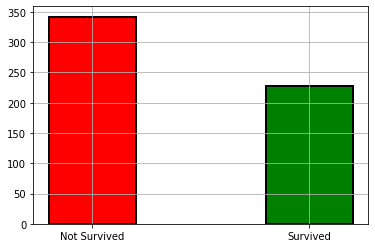

Iteration: 	 0


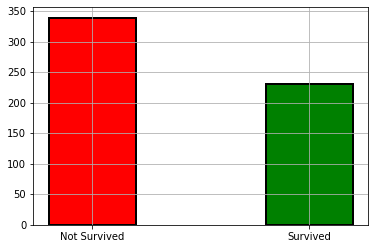

Iteration: 	 1


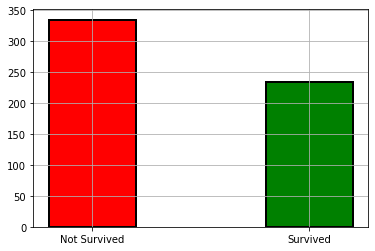

Iteration: 	 2


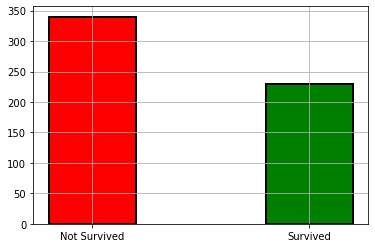

Iteration: 	 3


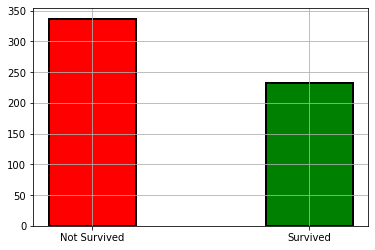

Iteration: 	 4


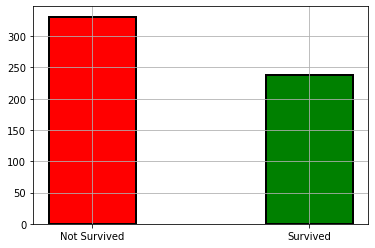

Iteration: 	 5


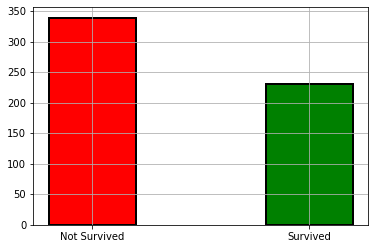

Iteration: 	 6


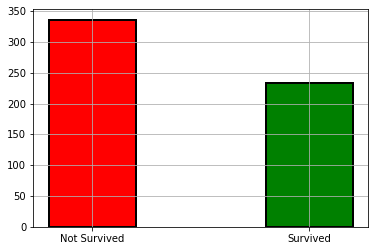

Iteration: 	 7


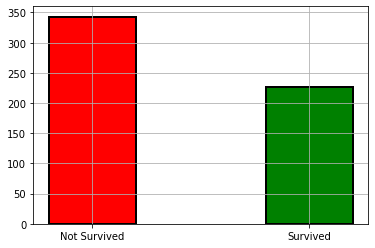

Iteration: 	 8


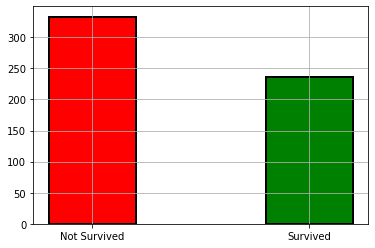

Iteration: 	 9


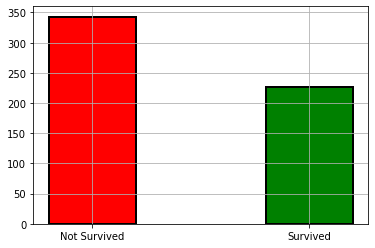

Iteration: 	 10


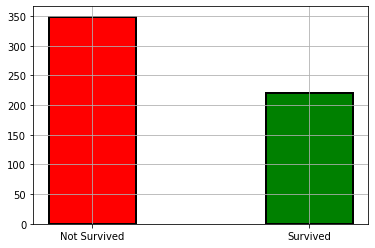

Iteration: 	 11


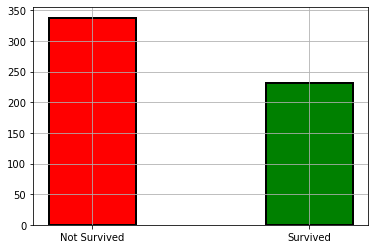

Iteration: 	 12


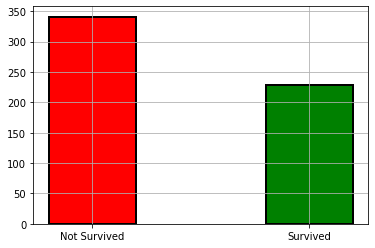

Iteration: 	 13


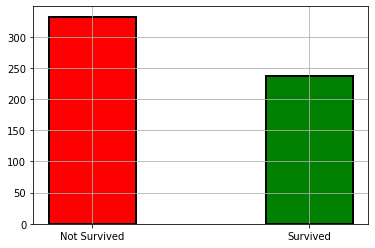

Iteration: 	 14


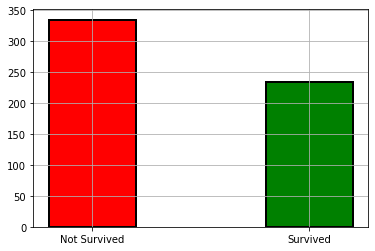

Iteration: 	 15


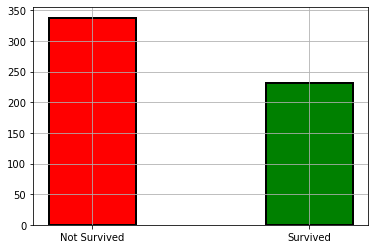

Iteration: 	 16


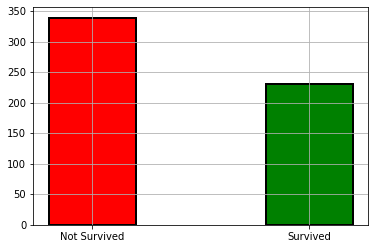

Iteration: 	 17


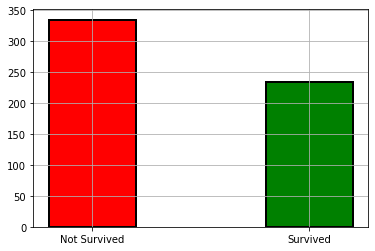

Iteration: 	 18


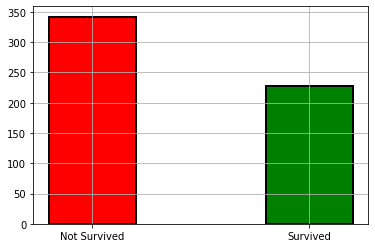

Iteration: 	 19


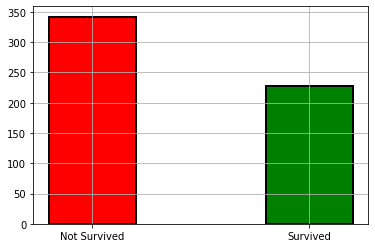

Iteration: 	 20


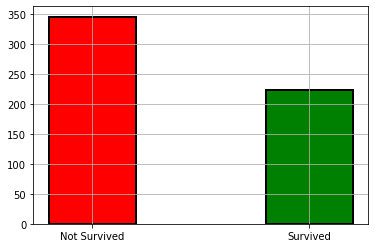

Iteration: 	 21


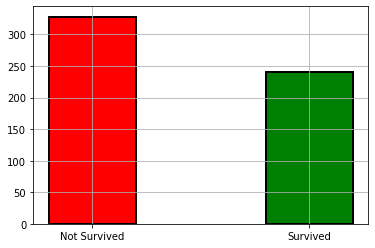

Iteration: 	 22


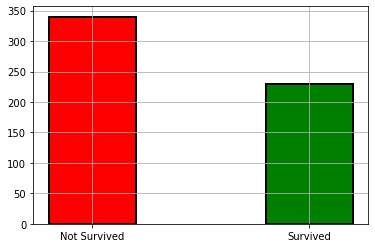

Iteration: 	 23


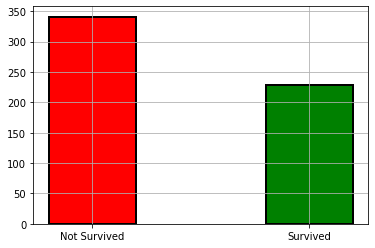

Iteration: 	 24


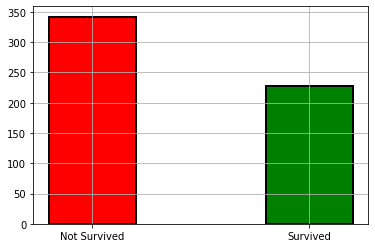

Iteration: 	 25


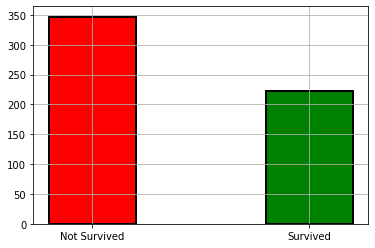

Iteration: 	 26


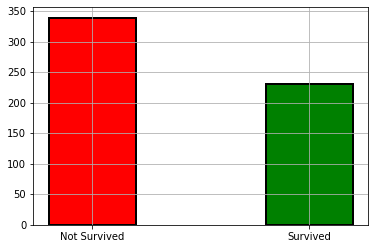

Iteration: 	 27


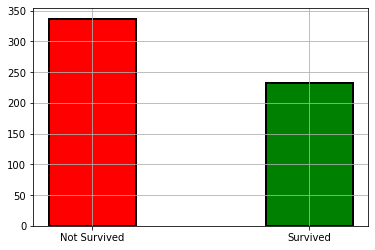

Iteration: 	 28


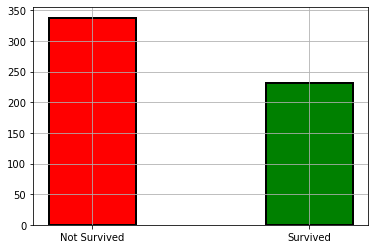

Iteration: 	 29


In [40]:
for i in range(rand_state):
    X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,train_size = 0.8, random_state = i)
    plt.figure()
    plt.bar(Y_Train.value_counts().index,Y_Train.value_counts(),color = ['r','g'],tick_label = ['Not Survived','Survived'],edgecolor = 'k',linewidth = 2,width = 0.4)
    plt.grid()
    plt.show()
    print("Iteration: \t",i)

##### Based on the figurative representation of random_states; the best possible solution for random_state is at random_state = 22

##### Hence, we will split our DataFrame with random_state = 22

In [41]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,train_size = 0.8, random_state = 22)
print("X_Train:\n",X_Train)
print("X_Test:\n",X_Test)
print("Y_Train:\n",Y_Train)
print("Y_Test:\n",Y_Test)

X_Train:
      Pclass     Fare   Age  Parch  n_Sex  n_Embarked
2         3   7.9250  26.0      0      1           0
98        2  23.0000  34.0      1      1           0
63        3  27.9000   4.0      2      0           0
216       3   7.9250  27.0      0      1           0
218       1  76.2917  32.0      0      1           1
..      ...      ...   ...    ...    ...         ...
623       3   7.8542  21.0      0      0           0
636       3   7.9250  32.0      0      0           0
447       1  26.5500  34.0      0      0           0
445       1  81.8583   4.0      2      0           0
165       3  20.5250   9.0      2      0           0

[569 rows x 6 columns]
X_Test:
      Pclass     Fare   Age  Parch  n_Sex  n_Embarked
767       3   7.7500  30.5      0      1           2
443       2  13.0000  28.0      0      1           0
326       3   6.2375  61.0      0      0           0
248       1  52.5542  37.0      1      0           0
721       3   7.0542  17.0      0      0           0
.. 

##### Validating result from Bar Chart.

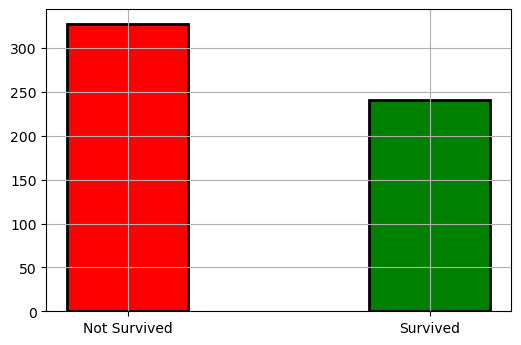

In [42]:
plt.figure(dpi = 100)
plt.bar(Y_Train.value_counts().index,Y_Train.value_counts(),color = ['r','g'],tick_label = ['Not Survived','Survived'],edgecolor = 'k',linewidth = 2,width = 0.4)
plt.grid()
plt.show()

<h2><u>Decision Tree Modelling</u></h2>
<h2> Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model. <br> ANSWER:</h2>

##### For implementing Decision Tree Classifier, we will first import the required library.

In [43]:
from sklearn.tree import DecisionTreeClassifier

##### Now we will fit our DataFrame and use the Classifier for max_depth of 6.

In [44]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth = 6)
titanic_dt = dt.fit(X_Train,Y_Train)       
#2D (6col) input and 1D Output

##### Now we will print some information about the created model "titanic_dt"

In [45]:
print("Classes:",titanic_dt.classes_)
print("Max Features:",titanic_dt.max_features_)
print(titanic_dt.tree_)

Classes: [0 1]
Max Features: 6


#####  Now we will visaulise our Decision Tree "titanic_dt"

In [46]:
# Only for windows 
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

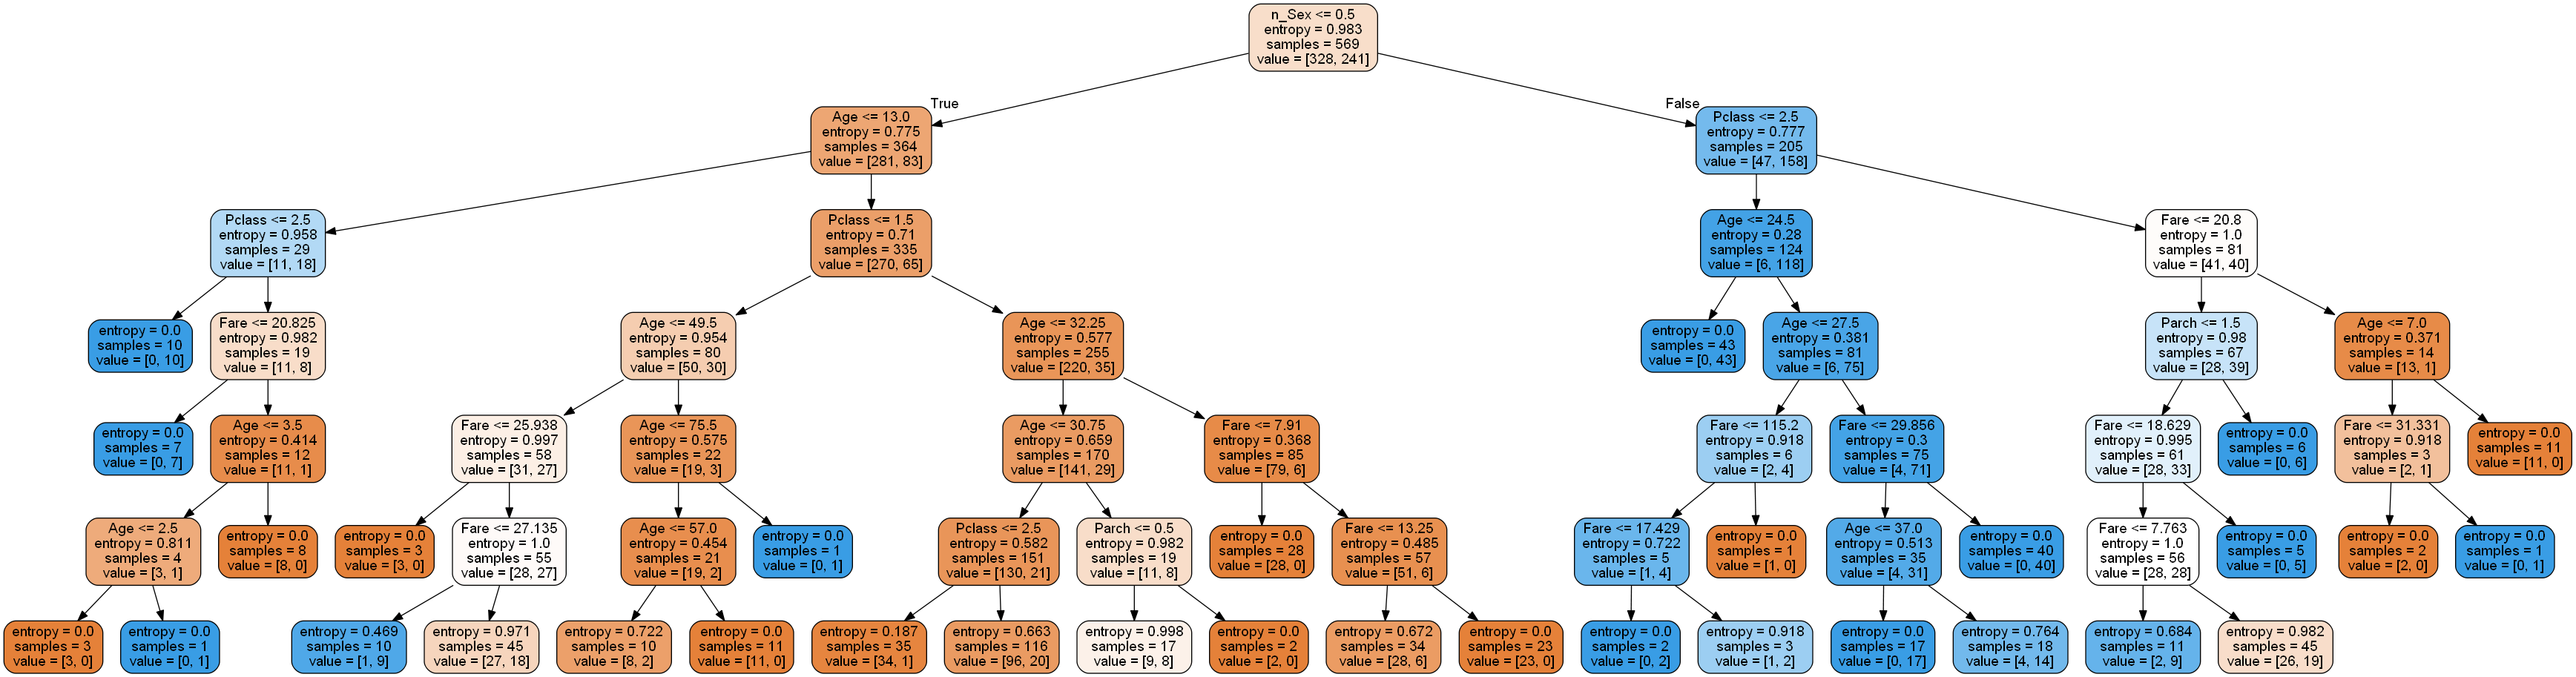

In [47]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DTImg = StringIO()

export_graphviz(titanic_dt , out_file = DTImg,
               filled = True , rounded = True,
               feature_names = ['Pclass','Fare','Age','Parch','n_Sex','n_Embarked'])

graph = pydotplus.graph_from_dot_data(DTImg.getvalue())
Image(graph.create_png())

##### We will now obtain confusion matrix for our created Decision Tree "titanic_dt".

In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_Test,titanic_dt.predict(X_Test)))

[[89  7]
 [13 34]]


##### To visualise our confusion matrix even more clearly, we will plot the HeatMap of the obtained Confusion Matrix of our model.

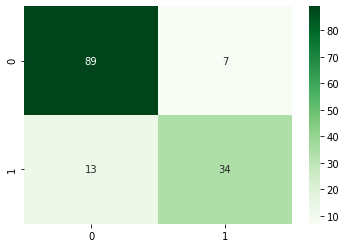

In [49]:
sb.heatmap(confusion_matrix(Y_Test,titanic_dt.predict(X_Test)),
          annot = True, cmap = 'Greens',
          xticklabels = titanic_dt.classes_,
          yticklabels = titanic_dt.classes_)

##### We will now obtain the score for the Decision Tree model "titanic_dt"

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test,titanic_dt.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        96
           1       0.83      0.72      0.77        47

    accuracy                           0.86       143
   macro avg       0.85      0.83      0.84       143
weighted avg       0.86      0.86      0.86       143



##### Accuracy of our Decision Tree model is 85% 

<h2> <u> Perceptron Modelling </u> </h2>
<h2> Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. <br> ANSWER:  </h2>

##### We will import libraries for our Perceptron Model.

In [51]:
#Creating the Perceptron Model
from sklearn.linear_model import Perceptron
classifier = Perceptron(max_iter = 400)
titanic_percepmodel = classifier.fit(X_Train,Y_Train)     #2D input and 1D output

##### Here we have created our Perceptron Model for the Titanic DataSet. <br> We will print some information about our created model.

In [52]:
print(titanic_percepmodel.classes_ )               #Unique values
print(titanic_percepmodel.coef_ )                   #Weights of Features
print(titanic_percepmodel.intercept_ )              #Threshold value
print(titanic_percepmodel.n_iter_)                  #Number of Iterations

[0 1]
[[-122.       31.0892  -21.92    -92.      348.       38.    ]]
[-2.]
7


##### We will now obtain the confusion matrix for our Perceptron Model.

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_Test,titanic_percepmodel.predict(X_Test)))

[[74 22]
 [12 35]]


##### To visualise our confusion matrix even more clearly, we will plot the HeatMap of the obtained Confusion Matrix of our model.

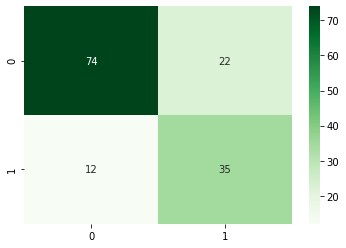

In [54]:
sb.heatmap(confusion_matrix(Y_Test,titanic_percepmodel.predict(X_Test)),
          annot = True, cmap = 'Greens',
          xticklabels = titanic_percepmodel.classes_,
          yticklabels = titanic_percepmodel.classes_)

##### We will now obtain the score for the Perceptron model "titanic_percepmodel"

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test,titanic_percepmodel.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        96
           1       0.61      0.74      0.67        47

    accuracy                           0.76       143
   macro avg       0.74      0.76      0.74       143
weighted avg       0.78      0.76      0.77       143



##### Accuarcy for our Perceptron Model is 76%

## Which of the two models fairs better? <br> ANSWER:

##### From the above two models: 
##### Decision Tree Model "titanic_dt" and Perceptron Model "titanic_percepmodel" 
##### The Decision Tree model has higher accuracy than the Percptron model. 
<h4> <u>Hence, the Decision Tree Model fairs better than the Perceptron Model. </u> </h4>

## BONUS(2%)
## There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization. <br> ANSWER:

##### Here, we will first check how strong and what is the relation of Age and Pclass column is:

In [56]:
my_data = titanic[['Pclass','Age']]
my_data

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


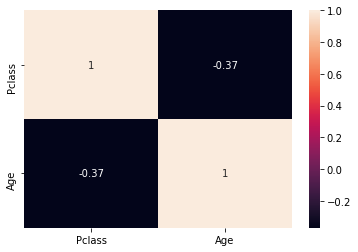

In [57]:
sb.heatmap(my_data.corr(),annot =True)

##### So, there is a strong relationship of 0.3 between age and pclass columns.

In [62]:
null_pclass = my_data[my_data['Age'].isnull()]['Pclass']
#print(null_pclass)
print(null_pclass.value_counts())

3    136
1     30
2     11
Name: Pclass, dtype: int64


##### So, there are 30 null values for Age for 1st Class, 11 null values for Age for 2nd Class and 136 null values for Age for 3rd class. We will now plot a bar chart for these null values.

In [59]:
values = list(null_pclass.value_counts())
index = list(null_pclass.value_counts().index)
print(values)
print(index)

[136, 30, 11]
[3, 1, 2]


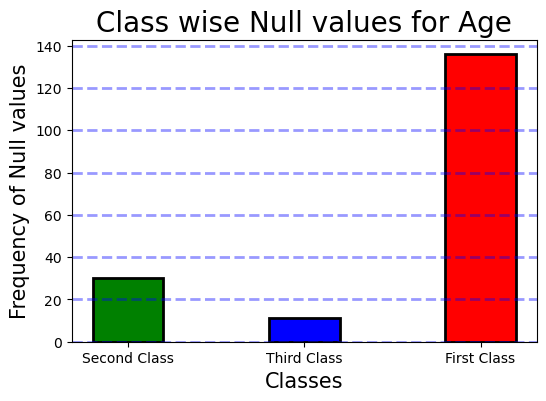

In [60]:
plt.figure(dpi=100)
plt.bar(index,values,width = 0.4,color =['r','g','b'],tick_label=['First Class','Second Class','Third Class'],edgecolor = 'k',linewidth = 2)
plt.title("Class wise Null values for Age",fontsize = 20)
plt.xlabel("Classes",fontsize = 15)
plt.ylabel("Frequency of Null values",fontsize = 15)
plt.grid(color = 'b',linestyle='--', linewidth=2, axis='y', alpha = 0.4)
plt.show()

##### Instead of Dropping the rows of Age entirely, we can put up the Mean Age values for each class of passengers individually.

In [61]:
fclass_age_mean = my_data[my_data['Pclass'] == 1]['Age'].mean()
sclass_age_mean = my_data[my_data['Pclass'] == 2]['Age'].mean()
tclass_age_mean = my_data[my_data['Pclass'] == 3]['Age'].mean()
print("Mean of Ages of individual classes are:\n")
print("First Class passenger's Age Mean:\t",fclass_age_mean)
print("Second Class passenger's Age Mean:\t",sclass_age_mean)
print("Third Class passenger's Age Mean:\t",tclass_age_mean)

Mean of Ages of individual classes are:

First Class passenger's Age Mean:	 38.233440860215055
Second Class passenger's Age Mean:	 29.87763005780347
Third Class passenger's Age Mean:	 25.14061971830986
